In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload your CSV (e.g., 'property_data.csv')

Saving house_prices_tiny.csv to house_prices_tiny.csv


In [ ]:
import pandas as pd

# Load data
data = pd.read_csv('house_prices_tiny.csv')  # Use if you uploaded a file
print(data.head())  # Check first 5 rows

# Basic stats
print("\nStatistics:")
print(data.describe())

   Size_sqft  Price_USD
0        600      84000
1        800     110000
2       1000     137000
3       1200     160000
4       1400     181500

Statistics:
         Size_sqft      Price_USD
count     8.000000       8.000000
mean   1300.000000  172437.500000
std     489.897949   61625.851197
min     600.000000   84000.000000
25%     950.000000  130250.000000
50%    1300.000000  170750.000000
75%    1650.000000  216000.000000
max    2000.000000  262000.000000


In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare data
X = data[['Size_sqft']]  # Features (must be 2D)
y = data['Price_USD']     # Target

# Initialize and train model
model = LinearRegression()
model.fit(X, y)

# Get coefficients (m and b)
print(f"Slope (m): {model.coef_[0]:.2f}")
print(f"Intercept (b): {model.intercept_:.2f}")

Slope (m): 125.74
Intercept (b): 8970.24


In [ ]:
# Predict for new sizes (e.g., 1500, 2500, 3000 sq.ft)
new_sizes = pd.DataFrame({'Size_sqft': [1500, 2500, 3000]})
predictions = model.predict(new_sizes)

# Display results
for size, price in zip(new_sizes['Size_sqft'], predictions):
    print(f"Predicted price for {size} sq.ft: ${price:,.2f}")

Predicted price for 1500 sq.ft: $197,586.31
Predicted price for 2500 sq.ft: $323,330.36
Predicted price for 3000 sq.ft: $386,202.38


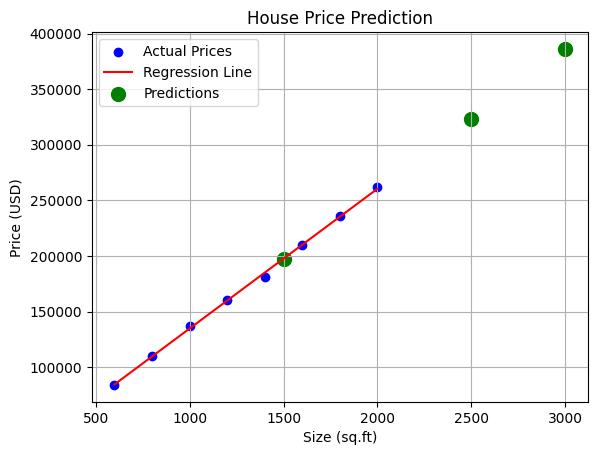

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of actual data
plt.scatter(X, y, color='blue', label='Actual Prices')

# Regression line
plt.plot(X, model.predict(X), color='red', label='Regression Line')

# Predictions
plt.scatter(new_sizes, predictions, color='green', label='Predictions', s=100)

# Customize plot
plt.xlabel('Size (sq.ft)')
plt.ylabel('Price (USD)')
plt.title('House Price Prediction')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import joblib
joblib.dump(model, 'house_price_predictor.pkl')  # Download for later use

# To download to your local machine:
files.download('house_price_predictor.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>